The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading /home/facundoq/data/datasets/spectrogram/scans2023/Hu_1057_mu_Cen_mu Cen.png
0.19150072


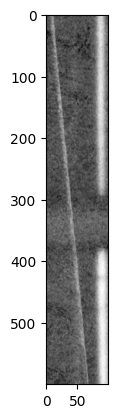

In [34]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder = Path("/home/facundoq/data/datasets/spectrogram/scans2023/")

file = 10
files = list([x for x in folder.iterdir() if x.is_file()])

filepath = files[file]

print(f"Loading {filepath}")


image = 1-imread(filepath)
image = image[600:1200,600:700]
print(image.min())
plt.imshow(image,cmap="gray")



Text(0.5, 1.0, 'Original vs smoothed, window=12, order=1')

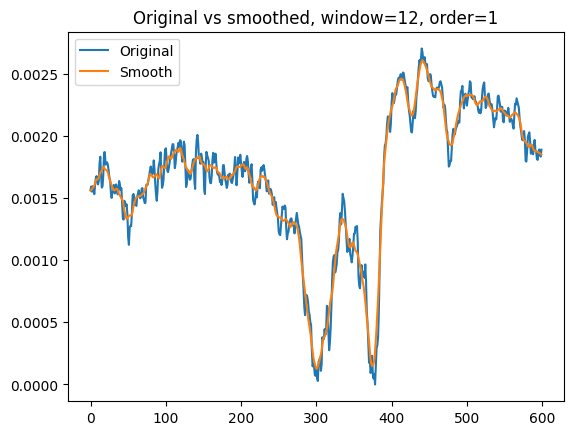

In [35]:

from scipy.signal import savgol_filter
def image_to_signals_distribution(image,window_size,polyorder):
    n,m=image.shape
    x = np.arange(n)
    y = (image.max(axis=1)*0.2+image.mean(axis=1)*0.8)
    y = y -y.min()
    y = y/y.sum()
    plt.plot(x,y,label="Original")
    #smoothing
    y = savgol_filter(y,window_size,polyorder)
    y = y/y.sum()
    return x,y
n,m=image.shape
window_size,polyorder = int(n*0.02),1
x,y = image_to_signals_distribution(image,window_size,polyorder)
plt.plot(x,y,label="Smooth")
plt.legend()
plt.title(f"Original vs smoothed, window={window_size}, order={polyorder}")


[300 375]


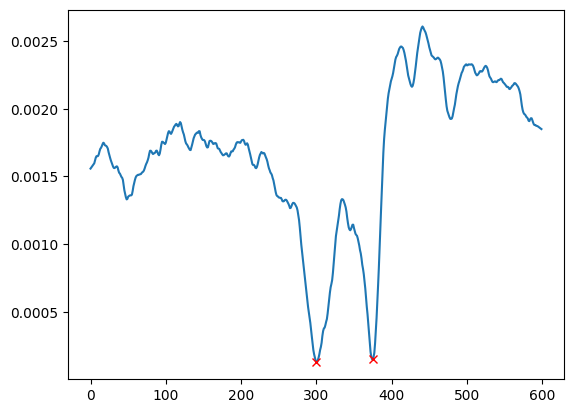

In [41]:
from scipy.signal import find_peaks,savgol_filter
def find_spectra(x,y):
    y = y
    n, = x.shape
    prominence = y.mean()/5
    
    peaks, _ = find_peaks(y, distance=n*0.01,height=y.mean()/2,prominence=y.std()*0.7)
    return peaks

peaks = find_spectra(x,-y)
plt.plot(x,y)
plt.plot(peaks, y[peaks], "xr");
print(peaks) 


[139.08694415] [[6885.38819875]]
[509.7305375] [[2945.71484535]]
[394.00188284] [[3290.10357728]]


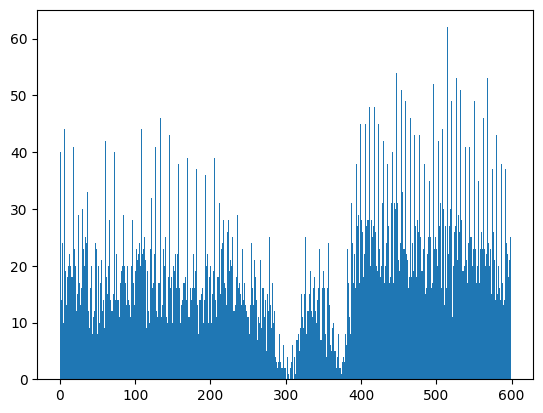

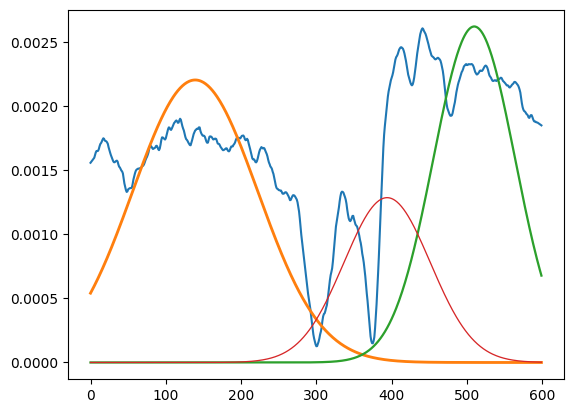

In [45]:
from util import pdf_to_samples,sample_pdf
from scipy.stats import norm

s = sample_pdf(x,y,10000)
plt.hist(s,bins=500)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3,init_params="k-means++",n_init=4).fit(s[:,None])
for mean,var in zip(gmm.means_,gmm.covariances_):
    print(mean,var)

def plot_gm(gmm,x,y):
    f,ax = plt.subplots(1)

    ax.plot(x,y)
    
    for i in range(len(gmm.weights_)):
        mu,sigma,pi=gmm.means_[i].squeeze(),gmm.covariances_[i].squeeze(),gmm.weights_[i]
        distribution = norm(loc=mu,scale=np.sqrt(sigma))
        p = distribution.pdf(x)*pi
        ax.plot(x,p,linewidth=4*pi+0.2,label = f"μ={mu:.2f},σ={sigma:.3f},π={pi:.2f}")
    # print(f"Final result:\n {gmm}")
plot_gm(gmm,x,y)

In [ ]:
from util import sample_pdf


def find_signals(x,y,window_size):
    s = sample_pdf(x,y,len(y))
    

[nan nan nan]
